In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_store = pd.read_csv("store.csv")
data_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
del data_store['PromoInterval']
data_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN


In [5]:
data_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN


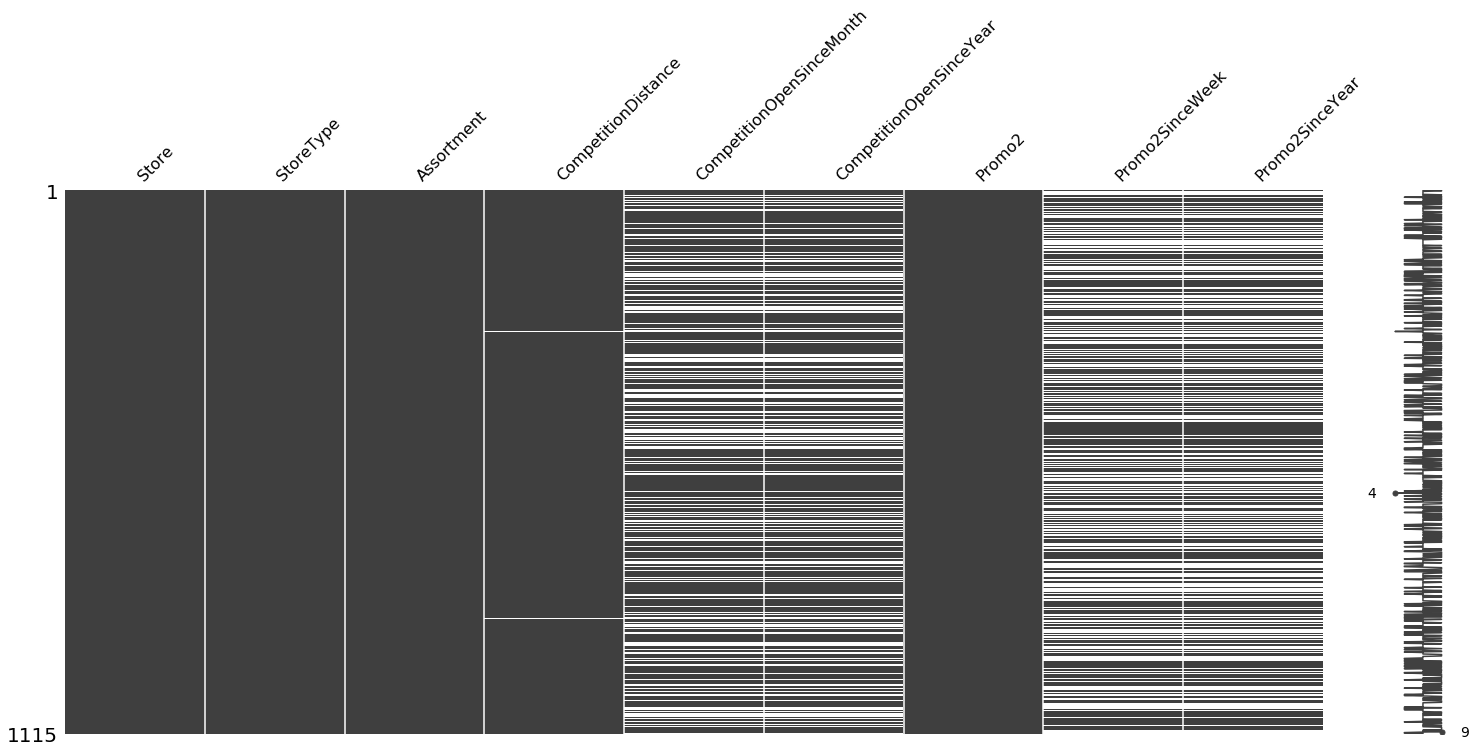

In [8]:
import missingno
%matplotlib inline
missingno.matrix(data_store)        #缺失值，可视化

In [9]:
data_sales = pd.read_csv('train.csv')
data_sales.head()

d:\document\python_vir\tensor\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [13]:
data_sales.shape

(1017209, 9)

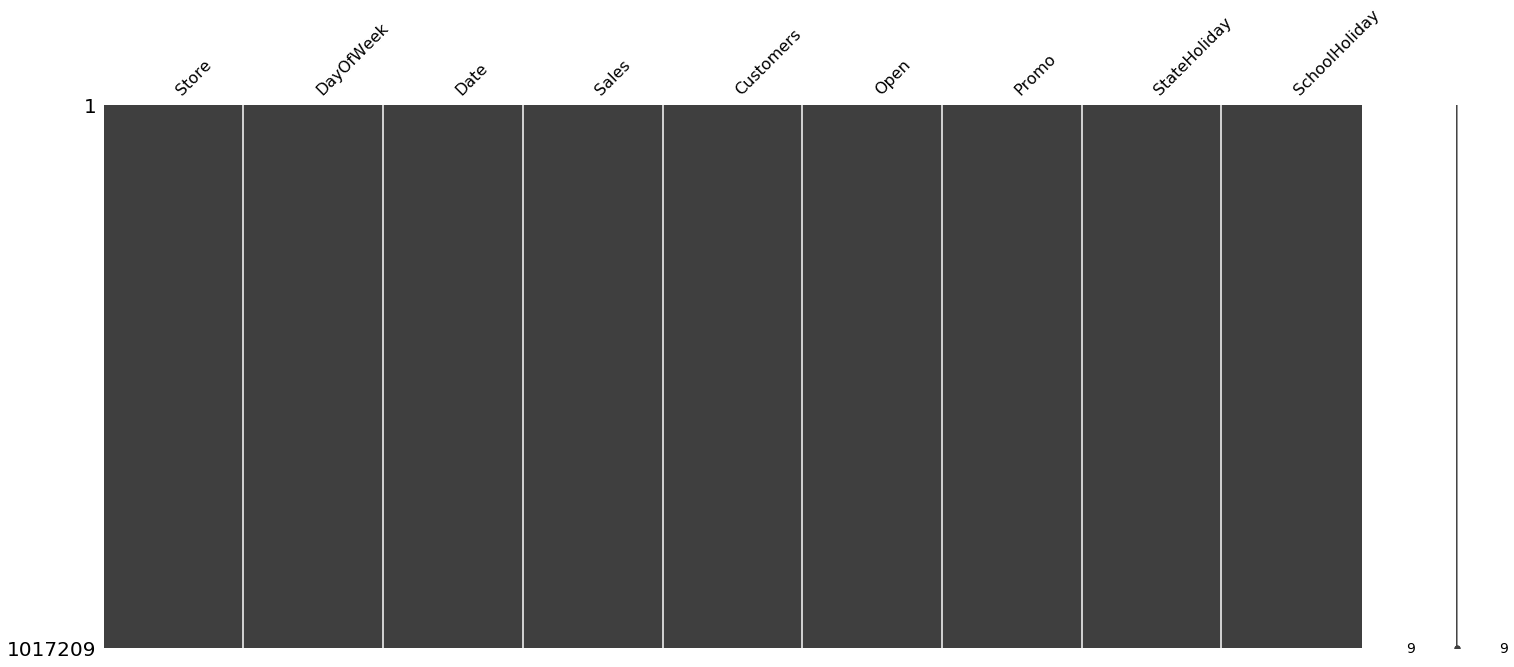

In [17]:
import missingno
%matplotlib inline
missingno.matrix(data_sales)        #缺失值，可视化
data_sales = data_sales.dropna(thresh = data_sales.shape[0]*0.5, axis = 1)

In [18]:
data_sales['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [20]:
index = data_sales['Open'] == 1
data_sales = data_sales.ix[index]
data_sales.shape

d:\document\python_vir\tensor\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(844392, 9)

In [21]:
index = data_sales['Sales'] > 0
data_sales = data_sales.ix[index]
data_sales.shape

d:\document\python_vir\tensor\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


(844338, 9)

In [23]:
data = pd.merge(data_store , data_sales , on = 'Store')

In [24]:
data.shape

(844338, 17)

In [25]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1
